In [43]:
import pandas as pd
import numpy as np
from numpy import absolute
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
import matplotlib.pyplot as plt
import statistics
from yellowbrick.regressor import PredictionError
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.regressor import ResidualsPlot
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
import sklearn
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import category_encoders

#https://scikit-learn.org/stable/modules/ensemble.html#forest

In [44]:
# Reading the dataset

mydata = pd.read_excel("ML_Ready_for_Algorithms_modificado_names.xlsx")

one_hot = OneHotEncoder()

#one_hot = category_encoders.one_hot.OneHotEncoder(use_cat_names=True)

encoded1 = one_hot.fit_transform(mydata[['land_cover']])
mydata[one_hot.categories_[0]] = encoded1.toarray()
encoded2 = one_hot.fit_transform(mydata[['grade']])
mydata[one_hot.categories_[0]] = encoded2.toarray()
encoded3 = one_hot.fit_transform(mydata[['distance_water']])
mydata[one_hot.categories_[0]] = encoded3.toarray()
encoded4 = one_hot.fit_transform(mydata[['fuel']])
mydata[one_hot.categories_[0]] = encoded4.toarray()
encoded5 = one_hot.fit_transform(mydata[['water']])
mydata[one_hot.categories_[0]] = encoded5.toarray()
encoded6 = one_hot.fit_transform(mydata[['toilet']])
mydata[one_hot.categories_[0]] = encoded6.toarray()

# Dropping Unnecessary Columns
mydata = mydata.drop(columns=['land_cover'])
mydata = mydata.drop(columns=['grade'])
mydata = mydata.drop(columns=['distance_water'])
mydata = mydata.drop(columns=['fuel'])
mydata = mydata.drop(columns=['water'])
mydata = mydata.drop(columns=['toilet'])

mydata.to_excel("mydata1.xlsx")
mydata

,Unnamed: 0,closest_river,closest_lake,fuel_station,forest_no_res,forest,deforestation,small_forest,close_forest,distribution,...,Water_piped_internal,Water_piped_public_free,Water_piped_public_paid,Water_piped_tap_outside,Water_protected_spring,Water_river-stream,Toilet_community,Toilet_flush,Toilet_none-fields,Toilet_pit_latrine
0,0,0.186985,0.118218,0.328202,0.285472,0.498311,0.498688,0.140796,0.360592,0.100563,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,0.241730,1.000000,0.840992,0.331482,0.119031,0.000000,0.567061,1.000000,0.215052,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1.000000,0.000000,0.714594,0.110972,0.057162,0.137135,0.000000,0.000000,0.254697,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,0.045416,0.146384,0.231321,0.171018,0.168361,0.257010,0.063711,0.238637,0.001509,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,0.355643,0.101878,0.064511,0.319828,0.085626,0.702228,0.321310,0.722815,0.033745,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,194,0.854847,0.262508,0.010697,0.460605,0.201809,1.000000,0.439255,0.165103,0.092659,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
195,195,0.094514,0.074970,0.161029,0.313649,0.127262,0.649390,0.380445,0.727434,0.046046,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
196,196,0.034888,0.115455,0.005541,0.335311,0.177492,0.652656,0.119670,0.003707,0.008183,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
197,197,0.285037,0.083565,0.527377,0.367126,0.334708,0.036128,0.579234,0.000000,0.655243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
mydata2 = pd.read_excel("mydata1.xlsx")

X = mydata2.drop(columns=['num_val','cookstove','Unnamed: 0.1', 'Unnamed: 0'])
y = mydata2['cookstove']
X

,closest_river,closest_lake,fuel_station,forest_no_res,forest,deforestation,small_forest,close_forest,distribution,transmission,...,Water_piped_internal,Water_piped_public_free,Water_piped_public_paid,Water_piped_tap_outside,Water_protected_spring,Water_river-stream,Toilet_community,Toilet_flush,Toilet_none-fields,Toilet_pit_latrine
0,0.186985,0.118218,0.328202,0.285472,0.498311,0.498688,0.140796,0.360592,0.100563,0.149200,...,0,0,0,0,0,1,0,0,1,0
1,0.241730,1.000000,0.840992,0.331482,0.119031,0.000000,0.567061,1.000000,0.215052,0.481820,...,0,1,0,0,0,0,0,0,0,1
2,1.000000,0.000000,0.714594,0.110972,0.057162,0.137135,0.000000,0.000000,0.254697,0.394831,...,1,0,0,0,0,0,0,0,0,1
3,0.045416,0.146384,0.231321,0.171018,0.168361,0.257010,0.063711,0.238637,0.001509,0.000000,...,0,1,0,0,0,0,0,0,0,1
4,0.355643,0.101878,0.064511,0.319828,0.085626,0.702228,0.321310,0.722815,0.033745,0.023504,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.854847,0.262508,0.010697,0.460605,0.201809,1.000000,0.439255,0.165103,0.092659,0.189688,...,1,0,0,0,0,0,0,0,0,1
195,0.094514,0.074970,0.161029,0.313649,0.127262,0.649390,0.380445,0.727434,0.046046,0.158278,...,1,0,0,0,0,0,0,0,0,1
196,0.034888,0.115455,0.005541,0.335311,0.177492,0.652656,0.119670,0.003707,0.008183,0.189798,...,0,1,0,0,0,0,0,0,0,1
197,0.285037,0.083565,0.527377,0.367126,0.334708,0.036128,0.579234,0.000000,0.655243,0.773599,...,0,0,0,0,0,0,0,1,0,0


In [46]:

# Assigning s categorical data to some colums

#X["land_cover"] = X["land_cover"].astype("category")
#X["sex"] = X["sex"].astype("category")
#X["grade"] = X["grade"].astype("category")
#X["distance_water"] = X["distance_water"].astype("category")
#X["fuel"] = X["fuel"].astype("category")
#X["water"] = X["water"].astype("category")
#X["toilet"] = X["toilet"].astype("category")

#y = y.astype("category")

In [47]:
# Check which columns are numerical and categorical

display(y.dtypes)
#type(X["land_cover"])
display(type(y))
display(type(X.loc[X.index.values[1], 'sex']))
#type(X.loc[X.index.values[1], 'land_cover'])
display(type(y.index.values[0]))

display(X.dtypes)
display(y.dtypes)

dtype('int64')

pandas.core.series.Series

numpy.int64

numpy.int64

closest_river               float64
closest_lake                float64
fuel_station                float64
forest_no_res               float64
forest                      float64
deforestation               float64
small_forest                float64
close_forest                float64
distribution                float64
transmission                float64
nat_sub_road_dist           float64
nat_road_dist               float64
luminance                   float64
travel_time                 float64
precipitation               float64
g1                          float64
g2                          float64
g3                          float64
g4                          float64
g5                          float64
age                         float64
members_house               float64
sex                           int64
LC_built-up                   int64
LC_cropland                   int64
LC_herbaceous_vegetation      int64
LC_shrubland                  int64
LC_unknown_open             

dtype('int64')

In [48]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(159, 58) (40, 58) (159,) (40,)


In [49]:
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)
#print(np.any(np.isnan(mydata))) # To check if there are nan's in the dataset
X_train

,closest_river,closest_lake,fuel_station,forest_no_res,forest,deforestation,small_forest,close_forest,distribution,transmission,...,Water_piped_internal,Water_piped_public_free,Water_piped_public_paid,Water_piped_tap_outside,Water_protected_spring,Water_river-stream,Toilet_community,Toilet_flush,Toilet_none-fields,Toilet_pit_latrine
198,0.045416,0.146384,0.231321,0.171018,0.168361,0.257010,0.063711,0.238637,0.001509,0.000000,...,0,1,0,0,0,0,0,0,0,1
37,0.240010,0.431186,0.262643,0.209011,0.000000,0.034322,0.257201,0.342773,1.000000,1.000000,...,0,0,0,0,1,0,0,0,0,1
78,0.241730,1.000000,0.840992,0.331482,0.119031,0.000000,0.567061,1.000000,0.215052,0.481820,...,0,1,0,0,0,0,0,0,0,1
40,0.192754,0.098826,0.314221,0.277688,0.380751,0.456402,0.095410,0.348079,0.094687,0.142819,...,0,0,0,0,0,1,0,0,0,1
69,0.240010,0.431186,0.262643,0.209011,0.000000,0.034322,0.257201,0.342773,1.000000,1.000000,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,1.000000,0.000000,0.714594,0.110972,0.057162,0.137135,0.000000,0.000000,0.254697,0.394831,...,1,0,0,0,0,0,0,0,0,1
144,0.186985,0.118218,0.328202,0.285472,0.498311,0.498688,0.140796,0.360592,0.100563,0.149200,...,0,0,0,0,0,1,0,0,0,1
95,0.033267,0.167743,0.194255,0.846694,0.953295,0.395864,0.805762,0.129392,0.231659,0.474917,...,0,0,0,0,0,1,1,0,0,0
66,0.241730,1.000000,0.840992,0.331482,0.119031,0.000000,0.567061,1.000000,0.215052,0.481820,...,0,1,0,0,0,0,0,0,0,1


In [50]:
#Establishment of the algorith
algorithm = RandomForestClassifier(random_state=1)

In [51]:
#Fitting the model
model = algorithm.fit(X_train, y_train)

In [52]:
#Training model evaluation

#The training coefficient of determination (r2)
print('The training r_sq is:', model.score(X_train, y_train))

The training r_sq is: 0.839913309352518


In [53]:
y_train

198    0
37     1
78     0
40     1
69     1
      ..
20     0
144    0
95     0
66     0
184    0
Name: cookstove, Length: 159, dtype: int64

In [54]:
#####Prediction on the training dataset
y_train_pred = model.predict(X_train)
y_train_pred

array([0.  , 0.65, 0.07, 0.67, 0.81, 0.  , 0.  , 0.1 , 0.  , 0.03, 0.03,
       0.02, 0.25, 0.  , 0.05, 0.02, 0.21, 0.26, 0.17, 0.28, 0.27, 0.  ,
       0.08, 0.  , 0.  , 0.03, 0.  , 0.18, 0.03, 0.  , 0.  , 0.04, 0.  ,
       0.03, 0.  , 0.65, 0.15, 0.02, 0.  , 0.  , 0.01, 0.02, 0.04, 0.22,
       0.08, 0.  , 0.  , 0.06, 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  ,
       0.69, 0.31, 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.01, 0.1 , 0.04,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.1 , 0.17, 0.  ,
       0.77, 0.19, 0.  , 0.01, 0.  , 0.72, 0.09, 0.73, 0.  , 0.  , 0.  ,
       0.67, 0.07, 0.71, 0.  , 0.61, 0.21, 0.77, 0.68, 0.02, 0.  , 0.  ,
       0.65, 0.8 , 0.02, 0.67, 0.  , 0.01, 0.81, 0.  , 0.01, 0.04, 0.16,
       0.02, 0.05, 0.  , 0.19, 0.06, 0.78, 0.  , 0.  , 0.01, 0.07, 0.01,
       0.02, 0.  , 0.13, 0.01, 0.  , 0.  , 0.  , 0.14, 0.  , 0.03, 0.  ,
       0.66, 0.66, 0.08, 0.1 , 0.  , 0.14, 0.09, 0.12, 0.07, 0.07, 0.06,
       0.07, 0.15, 0.  , 0.01, 0.06, 0.01, 0.1 , 0.

In [13]:
#The training coefficient of determination (r2) (onother way)
print('The training r_sq is:', r2_score(y_train, y_train_pred))

The training r_sq is: 1.0


In [14]:
#Metrics: Aca estoy comparando mi variable dependiente real (y_train) con lo que el modelo me predice (.predict) cuando le 
#doy mis datos de la variable independiente (X_train) que no se han probado antes.

#Mean absolute error
print('The CK is:', cohen_kappa_score(y_train, y_train_pred))
#Mean squared error
print('The A is:', accuracy_score(y_train, y_train_pred))
#Root mean squared error
print('The BA is:', balanced_accuracy_score(y_train, y_train_pred))
#The explained variance score
print('The F1 is:', f1_score(y_train, y_train_pred))

The CK is: 1.0
The A is: 1.0
The BA is: 1.0
The F1 is: 1.0


In [15]:
#Testing model evaluation

#The training coefficient of determination (r2)
#print('The Testing r_sq is:', model.score(X_test, y_test))

In [16]:
#####Prediction on the testing dataset
y_test_pred = model.predict(X_test)

In [17]:
#The testing coefficient of determination (r2) (onother way)
#print('The testing r_sq is:', r2_score(y_test, y_test_pred))

In [18]:
# Metrics: Aca estoy comparando mi variable dependiente real (y_test) con lo que el modelo me predice (.predict) cuando 
#le doy mis datos de la variable independiente (X_test) que no se han probado antes. 

# The mean absolute error
print('The MAE is:', cohen_kappa_score(y_test, y_test_pred))
# The mean squared error
print('The MSE is:', accuracy_score(y_test, y_test_pred))
#The root mean squared error
print('The RMSE is:', balanced_accuracy_score(y_test, y_test_pred))
#The explained variance score
print('The EVS is:', f1_score(y_test, y_test_pred))

The MAE is: -0.04347826086956519
The MSE is: 0.85
The RMSE is: 0.4857142857142857
The EVS is: 0.0


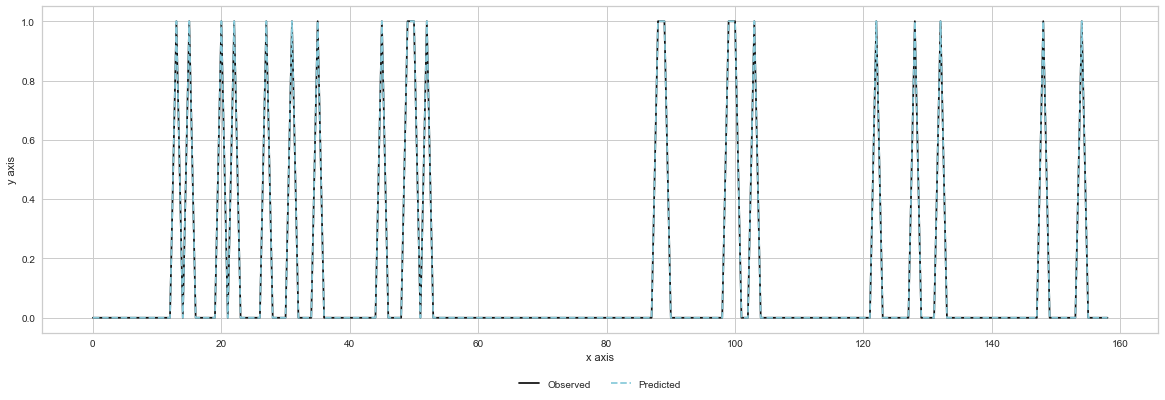

In [19]:
#####Plotting the observed and predicted data - TRAIN

#Setting the boudaries and parameters
plt.rcParams['figure.figsize'] = (20,6)
x_ax = range(len(X_train))

#Plotting
plt.plot(x_ax, y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, y_train_pred, label = 'Predicted', color = 'c', linestyle = '--')
plt.ylabel('y axis')
plt.xlabel('x axis')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.show()

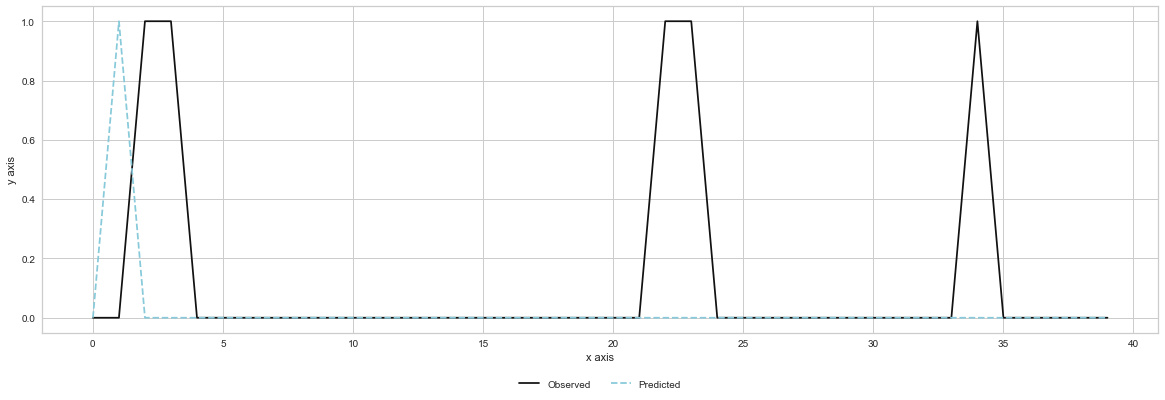

In [20]:
#####Plotting the observed and predicted data - TEST

#Setting the boudaries and parameters
plt.rcParams['figure.figsize'] = (20,6)
x_ax = range(len(X_test))

#Plotting
plt.plot(x_ax, y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, y_test_pred, label = 'Predicted', color = 'c', linestyle = '--')
plt.ylabel('y axis')
plt.xlabel('x axis')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.show()

In [21]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[138,   0],
       [  0,  21]], dtype=int64)

In [22]:
confusion_matrix(y_test, y_test_pred)

array([[34,  1],
       [ 5,  0]], dtype=int64)

# Performance Indicators with Cross-Validation

In [23]:
##### The k-fold cross-validation - Accuracy

#Training model cross-validation
score_train = cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv = 10)
#display(score_train)
#The absolute mean score
print('Accuracy for training:', absolute(np.mean(score_train)))

#Testing model cross-validation
score_test = cross_val_score(model, X_test, y_test, scoring = 'accuracy', cv = 10)
#display(score_test)
#The absolute mean score
print('Accuracy for testing:', absolute(np.mean(score_test)))

Accuracy for training: 0.8304166666666667


C:\Users\micae\anaconda3\envs\geo_env\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Accuracy for testing: 0.85


In [24]:
##### The k-fold cross-validation - Balanced_Accuracy

#Training model cross-validation
score_train = cross_val_score(model, X_train, y_train, scoring = 'balanced_accuracy', cv = 10)
display(score_train)
#The absolute mean score
print(absolute(np.mean(score_train)))

#Testing model cross-validation
score_test = cross_val_score(model, X_test, y_test, scoring = 'balanced_accuracy', cv = 10)
display(score_test)
#The absolute mean score
print(absolute(np.mean(score_test)))

array([0.5       , 0.5       , 0.42857143, 0.5       , 0.46428571,
       0.71428571, 0.46428571, 0.46428571, 0.58974359, 0.5       ])

0.5125457875457875


C:\Users\micae\anaconda3\envs\geo_env\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\micae\anaconda3\envs\geo_env\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


array([1.  , 1.  , 1.  , 0.75, 1.  , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ])

0.725


In [25]:
##### The k-fold cross-validation - f1 score

#Training model cross-validation
score_train = cross_val_score(model, X_train, y_train, scoring = 'f1', cv = 10)
display(score_train)
#The absolute mean score
print(absolute(np.mean(score_train)))

#Testing model cross-validation
score_test = cross_val_score(model, X_test, y_test, scoring = 'f1', cv = 10)
display(score_test)
#The absolute mean score
print(absolute(np.mean(score_test)))

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.5       , 0.        , 0.        , 0.33333333, 0.        ])

0.08333333333333333


C:\Users\micae\anaconda3\envs\geo_env\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\micae\anaconda3\envs\geo_env\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\micae\anaconda3\envs\geo_env\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\micae\anaconda3\envs\geo_env\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score i

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

0.0


In [26]:
##### The k-fold cross-validation - Cohen's Kappa
        
kfold = KFold(n_splits=10)
results_train = []
results = []
for train_index, test_index in kfold.split(X):
    X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2)
    model = model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    ck_ = cohen_kappa_score(y_train, y_train_pred)
    results_train.append(ck_)
ck = statistics.mean(results_train)#,statistics.variance(results_train), statistics.stdev(results_train)
print(ck)  

kfold = KFold(n_splits=10)
results_test = []
results = []
for train_index, test_index in kfold.split(X):
    X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2)
    model = model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    ck_ = cohen_kappa_score(y_test, y_test_pred)
    results_test.append(ck_)
ck = statistics.mean(results_test)#,statistics.variance(results_test), statistics.stdev(results_test)
print(ck)  

1.0
0.004894503807591255


In [27]:
f_list = list(X.columns.values)
f_list

['closest_river',
 'closest_lake',
 'fuel_station',
 'forest_no_res',
 'forest',
 'deforestation',
 'small_forest',
 'close_forest',
 'distribution',
 'transmission',
 'nat_sub_road_dist',
 'nat_road_dist',
 'luminance',
 'travel_time',
 'precipitation',
 'g1',
 'g2',
 'g3',
 'g4',
 'g5',
 'age',
 'members_house',
 'sex',
 'LC_built-up',
 'LC_cropland',
 'LC_herbaceous_vegetation',
 'LC_shrubland',
 'LC_unknown_open',
 'Edu_bachelor',
 'Edu_no_education',
 'Edu_primary',
 'Edu_secondary',
 'Edu_tertiary',
 'Dist_10-50m',
 'Dist_100-500m',
 'Dist_50-100m',
 'Dist_500-1000m',
 'Dist_<20m',
 'Dist_>1000m',
 'Fuel_coal-charcoal',
 'Fuel_dung',
 'Fuel_gas',
 'Fuel_grid-solar',
 'Fuel_wood',
 'Water_borehole',
 'Water_dam-stagnent',
 'Water_non_borehole',
 'Water_others',
 'Water_piped_internal',
 'Water_piped_public_free',
 'Water_piped_public_paid',
 'Water_piped_tap_outside',
 'Water_protected_spring',
 'Water_river-stream',
 'Toilet_community',
 'Toilet_flush',
 'Toilet_none-fields',
 'T

# Feature Importance

In [32]:
# Random Forest Feature Ranking
#Aca obtenemos la importancia de las variable independientes en la predicion

#f_list = list(['closest_lake','closest_river','fuel_station', 'forest_no_res', 'forest','deforestation','small_forest',
#            'close_forest','distribution','transmission','nat_sub_road_dist','nat_road_dist','luminance','travel_time',
#            'precipitation','g1','g2','g3','g4','g5','age','members_house','land_cover','sex','grade','distance_water',
#            'fuel','water','toilet'])
f_list = list(X.columns.values)
#f_list = list(X.columns) #if this is a DataFrame
F_importance = pd.Series(model.feature_importances_, index = f_list).sort_values(ascending = False)
F_importance

age                         0.150850
members_house               0.072891
Dist_50-100m                0.045384
Dist_100-500m               0.043516
small_forest                0.043197
Water_river-stream          0.039590
sex                         0.036359
Water_piped_public_paid     0.028308
distribution                0.028124
LC_cropland                 0.026586
Dist_500-1000m              0.022607
travel_time                 0.022212
nat_road_dist               0.021705
g3                          0.020773
Dist_<20m                   0.019928
Dist_>1000m                 0.019578
Edu_primary                 0.018069
forest                      0.017848
Water_piped_public_free     0.017353
fuel_station                0.017348
transmission                0.016336
Edu_secondary               0.016122
nat_sub_road_dist           0.015287
closest_lake                0.014924
Fuel_coal-charcoal          0.014202
Fuel_wood                   0.014159
closest_river               0.012717
f

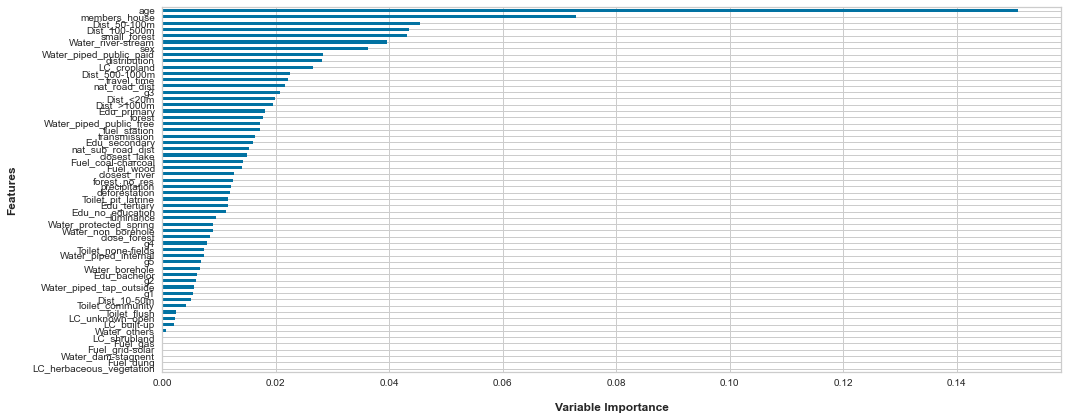

In [33]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (6, 11)
F_importance.plot.barh(ax=ax)
#ax.set_title("Feature importances using MDI")
ax.set_xlabel("Variable Importance", fontsize=12, fontweight="bold", labelpad=15)
ax.set_ylabel("Features", fontsize=12, fontweight="bold", labelpad=15)
ax.invert_yaxis()  
fig.tight_layout()
plt.savefig('features_All.jpg', dpi=500, bbox_inches='tight')

#https://matplotlib.org/stable/gallery/color/named_colors.html

C:\Users\micae\anaconda3\envs\geo_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
C:\Users\micae\anaconda3\envs\geo_env\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


Optimal number of features : 4


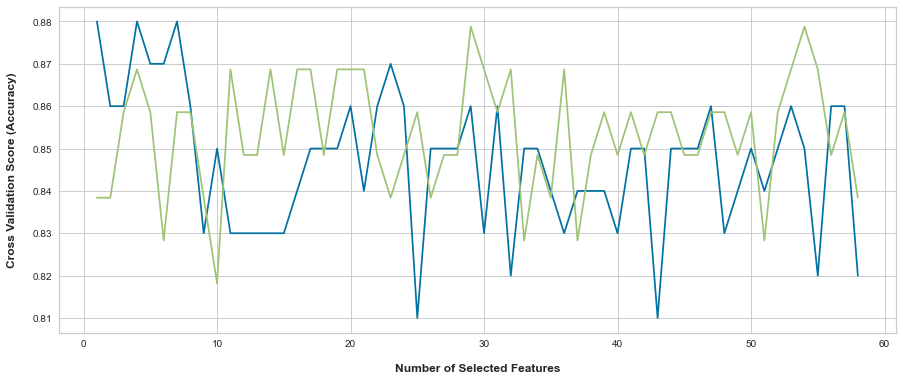

In [34]:
# Create the RFE object and compute a cross-validated score.
algorithm_to_cv  = RandomForestClassifier()
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=algorithm_to_cv,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)
rfecv

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.rcParams['figure.figsize'] = (15, 6)
plt.figure()

plt.xlabel("Number of Selected Features", fontsize=12, fontweight="bold", labelpad=15)
plt.ylabel("Cross Validation Score (Accuracy)", fontsize=12, fontweight="bold", labelpad=15)
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.savefig('Number_features_All.jpg', dpi=500, bbox_inches='tight')
plt.show()

# 

# --------------------------------------------------------------------------------------------------------------

In [31]:
# Try Ethiopia's data

In [ ]:
mydata_ET = pd.read_excel("ML_Ethiopia_ready_to_predict.xlsx")
mydata_ET

In [ ]:
X_test_ET = mydata_ET[['fuel_station', 'forest_no_res', 'forest','deforestation','small_forest','close_forest','distribution',
            'transmission','nat_sub_road_dist','nat_road_dist','luminance','travel_time','precipitation',
            'g1','g2','g3','g4','g5','age','members_house','land_cover','sex','grade','distance_water','fuel','water',
            'toilet']].copy()
X_test_ET

In [ ]:
y_test_ET = model.predict(X_test_ET)
y_test_ET

In [ ]:
f_list